# Peceptron Model - Sklearn

In [1]:
from sklearn import datasets
import numpy as np

iris =datasets.load_iris() #loading dataset
X = iris.data[:,[2,3]] #picking col2 and col3 
y = iris.target 
print("class labels", np.unique(y))

class labels [0 1 2]


 Select the columns to be used for splitting training and testing data

In [2]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train  ,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify = y)



Create  the model

In [3]:
from sklearn.linear_model import Perceptron

In [4]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)


Train , standardize  and fit the model

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # creating StandardScaler object
sc.fit(X_train) # fitting training data
X_train_std = sc.transform(X_train) # standardize train value
X_test_std = sc.transform(X_test) # standardize test value

In [6]:
ppn.fit(X_train_std,y_train) # fitted the values 

Perceptron(eta0=0.1, max_iter=40, random_state=1)

Generate predictions and identifying the number of misclassified samples


In [7]:
ypred = ppn.predict(X_test_std)
print("Misclassified samples :",(y_test != ypred).sum())


Misclassified samples : 1


To check the accuracy of model

In [8]:
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y_test,ypred))

Accuracy : 0.9777777777777777


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
                                  
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


In [10]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
print(y_test.shape)

(45,)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


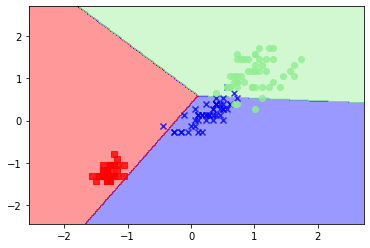

In [11]:
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=(105,149))

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


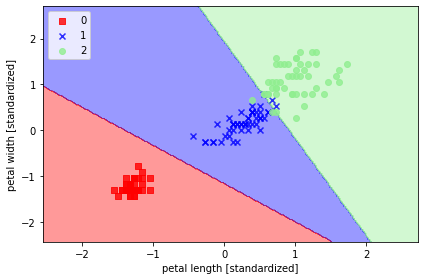

In [13]:
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=lr,test_idx=(105,149))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()